In [1]:
from IPython.display import Image

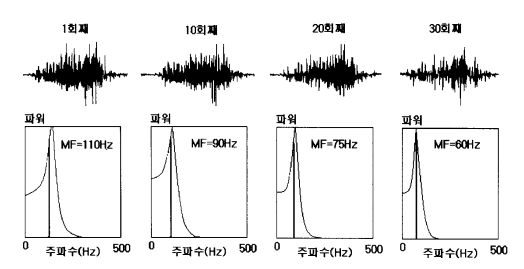

In [2]:
Image('C:/Users/jy990/Study/EMG/Image/5.1.PNG')

표면 전극으로 염화은(AgCl)을 사용해 미세한 전기 신호를 감지 할 수 있고, 1회용으로 사용하고 버릴 수 있는 양전극, 음전극, 접지 전극으로 측정했다.  

전극에서 측정된 신호는 증폭장치에 입력되어 증폭되며, 22$Hz$ 이상으로 고역필터링된 신호를 컴퓨터에 입력해 근육피로가 측정되는 형태로 구성한다.  

모든 컴퓨터에 표준 내장된 사운드카드는 16bit 22$KHz-48KHz$의 샘플링 주파수로 신호를 변환시키는 A/D변환기, 자동 고역필터링 기능을 가진 디지털 신호 프로세서로 구성되어 있다.  

근전도 신호를 증폭칩으로 5000배에서 10000배 즈폭되는데, 가변 저항에 의해 증폭률을 조절하게 만들었다. 증폭과 필터가 된 아날로그 근전도 신호는 오디어선을 통해 컴퓨터에 있는 사운드카드에 입력되고, 사운드카드는 아날로그 신호를 디지털 신호로 변환하기 위해 A/D변환기와 DSP(외부 잡음을 제거하면서 고속으로 연산)로 구성되어있기에 디스플레이로 디지털 신호를 넘길 수 있다.  

시계열 신호로 만들어진 근전도를  파워스펙트럼으로 변환하기 위해 자기회귀모델(Autoregressive model)이 적용된다.

근전도 신호 $X(t) = -\sum_{i=1}^p a(p,i)X(t-i) + e(t)$  

$a(p,i)$ : 자기회귀모델 계수  
$p$ : 자기회귀모델 차수  
$e(t)$ : 백색잡음  

적응성을 고려해 최소자승법으로 자기회귀모델 차수를 결정하는데, 여기서는 해상도가 가장 좋은 모델 차수를 4-10차로 결정했다. 자기회귀모델에 의한 근전도 파워 스펙트럼은 최대엔트로피법(Maximum Entropy Method)에 따라 아래와 같이 구성된다.  

$PS(f) = \frac{V_pD}{\left| 1+E_x(f)\right|^2}$  

$E_x(f) = \sum_{i=0}^p a(p,i)exp(-j2\pi fiD)$  

$V_p$ : 근전도 평균 분산  
$D$ : 샘플 간격($\frac{1}{x KHz}$)  
$E_x(f)$ : 기댓값  

파워 스펙트럼 $PS(f)$의 누적 파워를 적분해 중간 등분에 해당하는 주파수를 중간 주파수(Median Frequency)로 정의하고, 근육의 피로가 이동할 때 이 중간 주파수가 저주파수로 이동하는 현상을 보인다.  

$\int_{0}^{MF} PS(f)df = \int_{MF}^{CF} PS(f)df$  

$CF$ : 파워스펙트럼의 상단 컷오프 주파수  

중간주파수(MF)가 결정되면 근력 운동의 반복 횟수에 따른 중간주파수 변화가 관찰되며, 급격히 저주파로 이동하는 점을 threshold로 정해 이 지점을 근육 피로점이라고 판단할 수 있는 것이다.

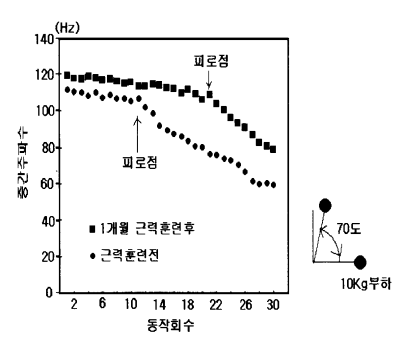

In [3]:
Image('C:/Users/jy990/Study/EMG/Image/5.2.PNG')